In [41]:
import tensorflow 
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

In [6]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f"Shapes: train_data = {train_data.shape}")
print(f"Shapes: train_labels = {train_labels.shape}")
print(f"Shapes: test_data = {test_data.shape}")
print(f"Shapes: test_labels = {test_labels.shape}")
print(f"Sample train data = {train_data[0]}")
print(f"Sample train label = {train_labels[0]}")
print(f"Sample test data = {test_data[0]}")
print(f"Sample test label = {test_labels[0]}")


2121728/2110848 [==============================] - 0s 0us/step
Sahpes: train_data = (8982,)
Sahpes: train_labels = (8982,)
Sahpes: test_data = (2246,)
Sahpes: test_labels = (2246,)
Sample train data = [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Sample train label = 3
Sample test data = [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 

In [12]:
# Get the actual review words from the integer indices.

word_dict = reuters.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_dict.items())

def get_news_words(record_idx):
    return " ".join([reverse_word_index.get(i-3, "?") for i in train_data[record_idx]])

get_news_words(0)

565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [22]:
def vectorize_data(sequences, vector_size=10000):
    """
        This method accepts a list of sequences, and converts them to multi-hot vectors.
        Every sequence is a list of integer indices that map an integer to a word.
        Vectorizing our data this way allows it to be used as an input to a deep learning model.
    """
    multi_hot_encoded_sequences = np.zeros((len(sequences), vector_size))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            multi_hot_encoded_sequences[i][j] = 1
    return multi_hot_encoded_sequences
    

In [23]:
print(train_data[0])
print(get_news_words(0))
print(vectorize_data(train_data[0:2]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [27]:
from tensorflow.keras.utils import to_categorical
vectorized_train_data = vectorize_data(train_data)
vectorized_test_data = vectorize_data(test_data)
vectorized_train_labels = to_categorical(train_labels)
vectorized_test_labels = to_categorical(test_labels)

In [33]:

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-06 16:28:12.344830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-06 16:28:12.345027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [37]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [38]:
# Splitting out some validation data
rand_indexes = np.random.permutation(len(train_data))
x_valid = vectorized_train_data[rand_indexes[0:1000]]
y_valid = vectorized_train_labels[rand_indexes[0:1000]]
x_train = vectorized_train_data[rand_indexes[1000:]]
y_train = vectorized_train_labels[rand_indexes[1000:]]


In [39]:
history = model.fit(x=x_train, 
                    y=y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

Epoch 1/20


2022-03-06 16:33:47.107296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 27ms/step - loss: 2.6827 - accuracy: 0.4883 - val_loss: 1.7666 - val_accuracy: 0.6350
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 1.5555 - accuracy: 0.6708

2022-03-06 16:33:49.396276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 14ms/step - loss: 1.4733 - accuracy: 0.6858 - val_loss: 1.2732 - val_accuracy: 0.7370
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0780 - accuracy: 0.7736 - val_loss: 1.0872 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8438 - accuracy: 0.8250 - val_loss: 0.9792 - val_accuracy: 0.7990
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6664 - accuracy: 0.8649 - val_loss: 0.9100 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5244 - accuracy: 0.8950 - val_loss: 0.8703 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4203 - accuracy: 0.9124 - val_loss: 0.8736 - val_accuracy: 0.8170
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3373 - accuracy: 0.9302 - val_loss: 0.8315 - val_accuracy: 0.8330
Epoch 9/20
16/16 [======

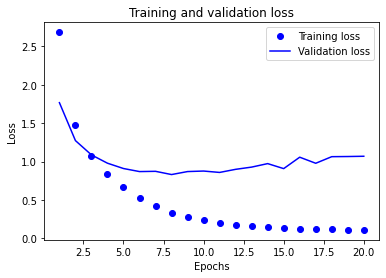

In [42]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

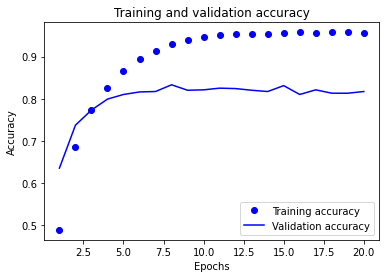

In [43]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(results)

Epoch 1/9
 1/16 [>.............................] - ETA: 4s - loss: 3.8552 - accuracy: 0.0137

2022-03-06 16:36:55.656163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 13ms/step - loss: 2.8037 - accuracy: 0.4885
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.5123 - accuracy: 0.6927
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.1238 - accuracy: 0.7630
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8923 - accuracy: 0.8122
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.7196 - accuracy: 0.8488
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5874 - accuracy: 0.8768
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.4706 - accuracy: 0.9019
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 0.3810 - accuracy: 0.9196
Epoch 9/9
19/71 [=======>......................] - ETA: 0s - loss: 0.8870 - accuracy: 0.7911

2022-03-06 16:36:57.835166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 0.9371 - accuracy: 0.7885
[0.9371419548988342, 0.7885129451751709]


In [52]:
import copy
test_labels_random_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_random_copy)
hits_array = np.array(test_labels_random_copy) == np.array(test_labels)
print(f"Average number of correct guesses at random = {hits_array.mean()}%")

Average number of correct guesses at random = 0.19456812110418523%


In [54]:
predictions = model.predict(vectorized_test_data)
print(predictions.shape)

(2246, 46)


In [57]:
# With softmax, the predictions add up to 1.0 because they describe a probability distribution.
np.mean([np.sum(predictions[i]) for i in range(len(predictions))])

1.0

In [59]:
test_class_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])
print(test_class_predictions)

[ 3 10  1 ...  3  3 24]


In [63]:
# reverse_word_index.get(test_class_predictions[1]-3)

'a'

In [64]:
# Bottleneck model
b_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
b_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
b_model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = b_model.evaluate(vectorized_test_data, vectorized_test_labels)
print(results)

Epoch 1/9


2022-03-06 16:52:11.110139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 18ms/step - loss: 3.5278 - accuracy: 0.0995
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 3.0327 - accuracy: 0.4052
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 2.5839 - accuracy: 0.4104
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 2.2398 - accuracy: 0.4014
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 1.9872 - accuracy: 0.4105
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 1.7519 - accuracy: 0.4404
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 1.5046 - accuracy: 0.6245
Epoch 8/9
16/16 [==============================] - 0s 11ms/step - loss: 1.2898 - accuracy: 0.6978
Epoch 9/9
13/71 [====>.........................] - ETA: 0s - loss: 1.3601 - accuracy: 0.6755

2022-03-06 16:52:13.280954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 1.4656 - accuracy: 0.6603
[1.4656245708465576, 0.6602849960327148]


In [65]:
# Bottleneck model
large_model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
large_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
large_model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = large_model.evaluate(vectorized_test_data, vectorized_test_labels)
print(results)

Epoch 1/9
 1/16 [>.............................] - ETA: 4s - loss: 3.8556 - accuracy: 0.0039

2022-03-06 16:52:49.063080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 16ms/step - loss: 2.0897 - accuracy: 0.5851
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 0.9869 - accuracy: 0.7804
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6195 - accuracy: 0.8730
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4306 - accuracy: 0.9127
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.3107 - accuracy: 0.9310
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.2266 - accuracy: 0.9471
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.2042 - accuracy: 0.9496
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9539
Epoch 9/9
19/71 [=======>......................] - ETA: 0s - loss: 1.0402 - accuracy: 0.7977

2022-03-06 16:52:51.178560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 1.0577 - accuracy: 0.7907
[1.057747721672058, 0.790739119052887]


In [66]:
# Shallow model
shallow_model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
shallow_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
shallow_model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = shallow_model.evaluate(vectorized_test_data, vectorized_test_labels)
print(results)

Epoch 1/9
 1/16 [>.............................] - ETA: 4s - loss: 3.8442 - accuracy: 0.0078

2022-03-06 16:53:35.675907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 14ms/step - loss: 1.9416 - accuracy: 0.6228
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8804 - accuracy: 0.8190
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5663 - accuracy: 0.8869
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.3964 - accuracy: 0.9199
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.2935 - accuracy: 0.9374
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.2295 - accuracy: 0.9484
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.1889 - accuracy: 0.9528
Epoch 8/9
16/16 [==============================] - 0s 16ms/step - loss: 0.1650 - accuracy: 0.9531
Epoch 9/9
10/71 [===>..........................] - ETA: 0s - loss: 0.8911 - accuracy: 0.8250

2022-03-06 16:53:38.175127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 0.9450 - accuracy: 0.8032
[0.9449613094329834, 0.8032057285308838]


In [67]:
# Small model
small_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
small_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
small_model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = small_model.evaluate(vectorized_test_data, vectorized_test_labels)
print(results)

Epoch 1/9


2022-03-06 16:54:06.406443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 14ms/step - loss: 3.4565 - accuracy: 0.4005
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 2.7517 - accuracy: 0.6334
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 2.2173 - accuracy: 0.6874
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 1.8293 - accuracy: 0.7077
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 1.5461 - accuracy: 0.7243
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 1.3365 - accuracy: 0.7471
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 1.1780 - accuracy: 0.7697
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0526 - accuracy: 0.7836
Epoch 9/9
10/71 [===>..........................] - ETA: 0s - loss: 1.1750 - accuracy: 0.7563

2022-03-06 16:54:08.764708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 12ms/step - loss: 1.2334 - accuracy: 0.7337
[1.233424186706543, 0.7337489128112793]


In [ ]:
q